In [1]:
install.packages("waveslim")


The downloaded binary packages are in
	/var/folders/8_/k0_fnkqj3qz7tz7d2thjyhmh0000gn/T//RtmpzhMqWw/downloaded_packages


In [5]:
library(waveslim)


waveslim: Wavelet Method for 1/2/3D Signals (version = 1.7.5)



In [33]:
data(ibm)

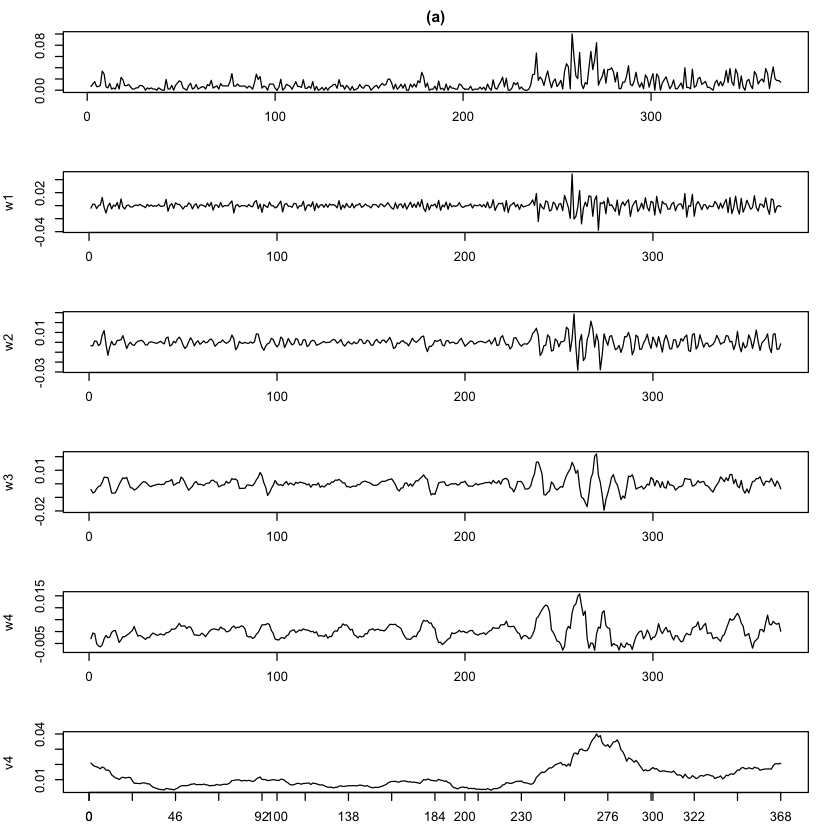

In [43]:
ibm.returns <- diff(log(ibm))
# Haar
ibmr.haar <- modwt(abs(ibm.returns), "haar")
names(ibmr.haar) <- c("w1", "w2", "w3", "w4", "v4")
# LA(8)
ibmr.la8 <- modwt(abs(ibm.returns), "la8")
names(ibmr.la8) <- c("w1", "w2", "w3", "w4", "v4")
# shift the MODWT vectors
ibmr.la8 <- phase.shift(ibmr.la8, "la8")
## plot partial MODWT for IBM data
par(mfcol=c(6,1), pty="m", mar=c(5-2,4,4-2,2))
plot.ts(abs(ibm.returns), axes=TRUE, ylab="", main="(a)")
for(i in 1:5)
  plot.ts(ibmr.haar[[i]], axes=TRUE, ylab=names(ibmr.haar)[i])
axis(side=1, at=seq(0,368,by=23), 
  labels=c(0,"",46,"",92,"",138,"",184,"",230,"",276,"",322,"",368))


In [45]:
abs(data.matrix(ibm.returns))

0.006543099
0.011001211
0.015368030
0.006514681
0.006514681
0.008676844
0.033973543
0.028808577
0.006103783
0.004073325
0.012121361


In [ ]:
par(mfcol=c(6,1), pty="m", mar=c(5-2,4,4-2,2))
plot.ts(abs(ibm.returns), axes=FALSE, ylab="", main="(b)")
for(i in 1:5)
  plot.ts(ibmr.la8[[i]], axes=FALSE, ylab=names(ibmr.la8)[i])
axis(side=1, at=seq(0,368,by=23), 
  labels=c(0,"",46,"",92,"",138,"",184,"",230,"",276,"",322,"",368))

In [25]:
ibm["abs_returns"] <- data.matrix(abs(ibm["returns"]))

In [31]:
ibm["haar"] <- modwt(data.matrix(ibm["abs_returns"]), "haar")


Warning message in `[<-.data.frame`(`*tmp*`, "haar", value = structure(list(d1 = c(-0.003780753796303, :
“provided 5 variables to replace 1 variables”

[1] 1.243404e-28

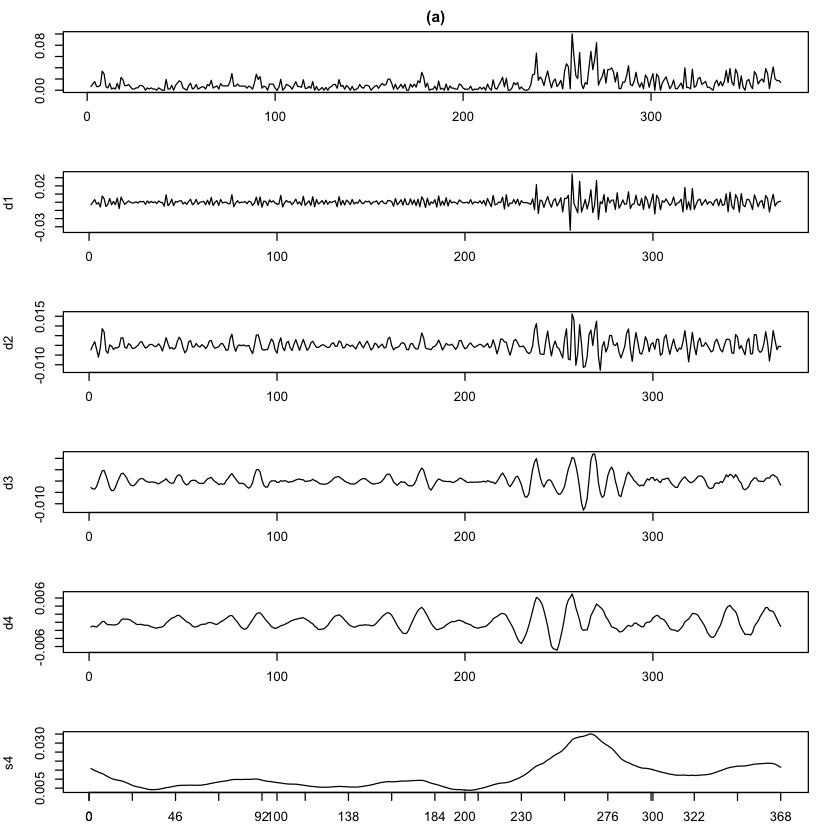

In [52]:
## Easy check to see if it works...
x <- rnorm(32)
x.mra <- mra(x)
sum(x - apply(matrix(unlist(x.mra), nrow=32), 1, sum))^2

## Figure 4.19 in Gencay, Selcuk and Whitcher (2001)
data(ibm)     
ibm.returns <- diff(log(ibm))
ibm.volatility <- abs(ibm.returns)
## Haar
ibmv.haar <- mra(ibm.volatility, "haar", 4, "modwt")
names(ibmv.haar) <- c("d1", "d2", "d3", "d4", "s4")
## LA(8)
ibmv.la8 <- mra(ibm.volatility, "la8", 4, "modwt")
names(ibmv.la8) <- c("d1", "d2", "d3", "d4", "s4")
## plot multiresolution analysis of IBM data
par(mfcol=c(6,1), pty="m", mar=c(5-2,4,4-2,2))
plot.ts(ibm.volatility, axes=TRUE, ylab="", main="(a)")
for(i in 1:5)
  plot.ts(ibmv.haar[[i]], axes=TRUE, ylab=names(ibmv.haar)[i])
axis(side=1, at=seq(0,368,by=23), 
  labels=c(0,"",46,"",92,"",138,"",184,"",230,"",276,"",322,"",368))


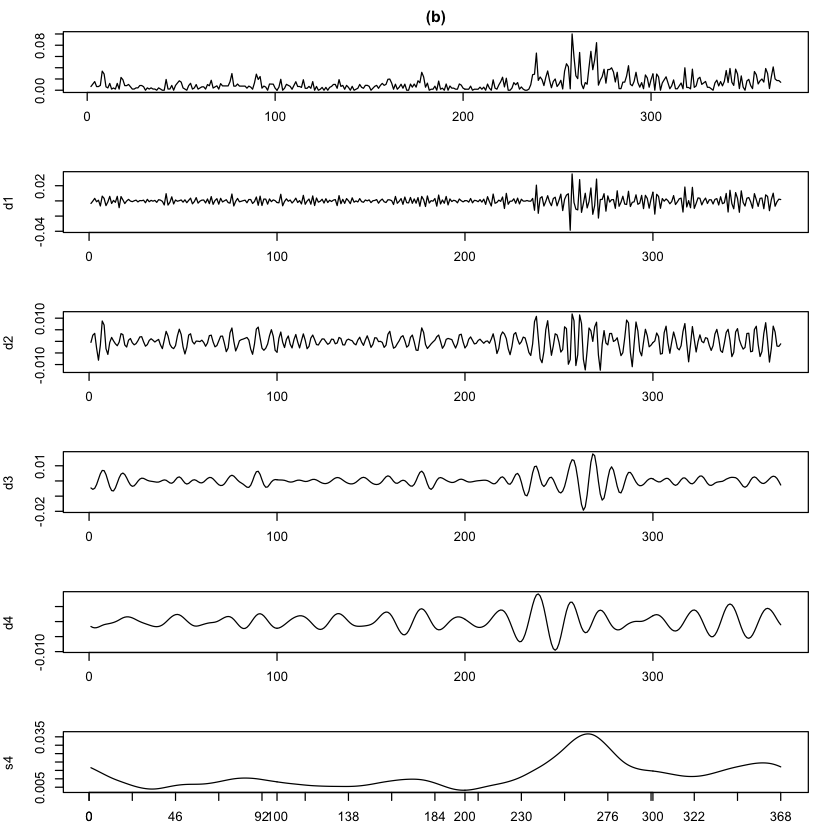

In [63]:
par(mfcol=c(6,1), pty="m", mar=c(5-2,4,4-2,2))
plot.ts(ibm.volatility, axes=TRUE, ylab="", main="(b)")
for(i in 1:5)
  plot.ts(ibmv.la8[[i]], axes=TRUE, ylab=names(ibmv.la8)[i])
axis(side=1, at=seq(0,368,by=23), 
  labels=c(0,"",46,"",92,"",138,"",184,"",230,"",276,"",322,"",368))

In [38]:
ibmv.la8[[3]]

[1] -4.614407e-03 -5.528953e-03 -4.835690e-03 -2.399911e-03  1.166149e-03
  [6]  4.704648e-03  6.921010e-03  6.790771e-03  4.238553e-03  2.182110e-04
 [11] -3.803629e-03 -6.335697e-03 -6.563327e-03 -4.604871e-03 -1.318397e-03
 [16]  2.062911e-03  4.464331e-03  5.202540e-03  4.224344e-03  2.056129e-03
 [21] -5.245009e-04 -2.599428e-03 -3.525323e-03 -3.178136e-03 -1.830220e-03
 [26] -1.327568e-04  1.215568e-03  1.828062e-03  1.678840e-03  1.074134e-03
 [31]  4.309104e-04  1.121949e-05 -2.055681e-04 -3.871164e-04 -5.964221e-04
 [36] -7.883532e-04 -7.345394e-04 -2.694262e-04  3.291105e-04  6.897348e-04
 [41]  4.637504e-04 -4.085749e-04 -1.286196e-03 -1.503194e-03 -7.288271e-04
 [46]  8.371288e-04  2.250467e-03  2.676042e-03  1.846456e-03  1.639390e-04
 [51] -1.377272e-03 -2.030246e-03 -1.604158e-03 -5.032127e-04  4.657854e-04
 [56]  8.024552e-04  3.914963e-04 -4.742311e-04 -1.154669e-03 -1.263941e-03
 [61] -6.647569e-04  4.924509e-04  1.622730e-03  2.289295e-03  2.225261e-03
 [66]  1.345669e-03  5.333143e-05 -1.321326e-03 -2.481968e-03 -3.021421e-03
 [71] -2.871436e-03 -1.920168e-03 -2.161852e-04  1.655704e-03  3.158756e-03
 [76]  3.756922e-03  3.196384e-03  1.942439e-03  5.567432e-04 -5.633591e-04
 [81] -1.343016e-03 -2.136773e-03 -3.156646e-03 -4.101964e-03 -4.218301e-03
 [86] -2.840272e-03  5.302769e-05  3.559795e-03  6.060947e-03  6.369001e-03
 [91]  4.303737e-03  7.666159e-04 -2.472510e-03 -4.139795e-03 -3.937044e-03
 [96] -2.365263e-03 -6.300569e-04  4.985748e-04  9.217086e-04  8.024779e-04
[101]  6.537555e-04  6.439928e-04  5.735979e-04  3.935584e-04  1.053482e-06
[106] -4.837326e-04 -7.369035e-04 -6.774689e-04 -3.323659e-04  1.565087e-04
[111]  5.004952e-04  5.322535e-04  2.963290e-04 -8.140103e-05 -3.534878e-04
[116] -2.738430e-04  1.044202e-04  6.232702e-04  1.027657e-03  1.025795e-03
[121]  6.336739e-04 -2.877080e-05 -7.745733e-04 -1.354685e-03 -1.693109e-03
[126] -1.731145e-03 -1.407651e-03 -7.602054e-04  1.467750e-04  1.134374e-03
[131]  1.910008e-03  2.260800e-03  2.086588e-03  1.452028e-03  5.846139e-04
[136] -3.106417e-04 -1.071926e-03 -1.615350e-03 -1.922676e-03 -1.929307e-03
[141] -1.582750e-03 -8.640847e-04  1.558083e-04  1.241128e-03  2.080044e-03
[146]  2.397472e-03  2.070337e-03  1.206774e-03  9.890230e-05 -9.473688e-04
[151] -1.735877e-03 -2.198720e-03 -2.355551e-03 -2.149559e-03 -1.452124e-03
[156] -2.280413e-04  1.348630e-03  2.748741e-03  3.363497e-03  2.886166e-03
[161]  1.445108e-03 -2.324872e-04 -1.353175e-03 -1.554445e-03 -8.773033e-04
[166]  3.364580e-05  4.728588e-04  1.719100e-04 -8.970607e-04 -2.293128e-03
[171] -3.308214e-03 -3.423976e-03 -2.254516e-03  1.906425e-04  3.176577e-03
[176]  5.609645e-03  6.455179e-03  5.053606e-03  1.826131e-03 -1.891755e-03
[181] -4.712160e-03 -5.558096e-03 -4.335668e-03 -2.003461e-03  3.490979e-04
[186]  1.870622e-03  2.242896e-03  1.842826e-03  1.137583e-03  3.821893e-04
[191] -2.458869e-04 -7.247230e-04 -1.020641e-03 -9.188712e-04 -4.032121e-04
[196]  3.147636e-04  9.675659e-04  1.185348e-03  8.767714e-04  2.836222e-04
[201] -3.324560e-04 -6.915651e-04 -7.016121e-04 -5.045392e-04 -2.393923e-04
[206] -1.034517e-06  1.554775e-04  2.616394e-04  3.954009e-04  4.934083e-04
[211]  4.695535e-04  2.226309e-04 -4.081321e-04 -1.227220e-03 -1.834362e-03
[216] -1.793340e-03 -7.815825e-04  8.409961e-04  2.286278e-03  2.707682e-03
[221]  1.691937e-03 -1.927845e-04 -1.855229e-03 -2.166246e-03 -6.861184e-04
[226]  1.896658e-03  4.284857e-03  4.981773e-03  3.178935e-03 -7.841984e-04
[231] -5.626797e-03 -9.222360e-03 -9.816783e-03 -6.775631e-03 -8.747210e-04
[236]  5.383181e-03  9.425510e-03  9.740458e-03  6.400510e-03  1.573069e-03
[241] -2.282843e-03 -3.651987e-03 -2.328609e-03  1.812148e-04  2.127335e-03
[246]  2.442073e-03  8.022431e-04 -2.016330e-03 -4.961805e-03 -7.211093e-03
[251] -7.904803e-03 -6.676242e-03 -3.593850e-03  1.134125e-03  6.538094e-03
[256]  1.123995e-02  1.399491e-02  1.349498e-02  9.109435e-03  1.540858e-03
[261] -7.526258e-03 -1.550728e-02 -1.928145e-02 -1

In [39]:
ibmr.la8[[3]]

[1] -5.593018e-03 -5.418776e-03 -4.095119e-03 -8.183968e-04  3.301345e-03
  [6]  6.446251e-03  8.180982e-03  6.479139e-03  1.588247e-03 -3.240835e-03
 [11] -6.941754e-03 -7.875087e-03 -5.849486e-03 -2.334250e-03  1.599751e-03
 [16]  4.480378e-03  6.124666e-03  5.568822e-03  3.207373e-03  5.750797e-04
 [21] -2.329896e-03 -3.940975e-03 -3.784849e-03 -2.697460e-03 -6.401393e-04
 [26]  1.349367e-03  2.321142e-03  2.309551e-03  1.396639e-03  1.804678e-04
 [31] -5.309706e-04 -6.782347e-04 -5.527277e-04 -6.011852e-04 -8.778328e-04
 [36] -1.369085e-03 -1.573272e-03 -5.662564e-04  3.554338e-04  1.092656e-03
 [41]  1.377018e-03 -4.194276e-04 -1.592885e-03 -1.456768e-03 -4.231471e-04
 [46]  2.615694e-03  4.402088e-03  3.855316e-03  1.726143e-03 -1.545466e-03
 [51] -3.196060e-03 -2.977604e-03 -1.396433e-03  5.264447e-04  8.816052e-04
 [56]  5.404502e-04 -2.363647e-04 -1.352224e-03 -1.361220e-03 -9.427265e-04
 [61] -3.551009e-04  1.251821e-03  2.231295e-03  2.331604e-03  1.905433e-03
 [66] -7.779327e-05 -1.564553e-03 -2.335503e-03 -3.020720e-03 -2.226510e-03
 [71] -1.700734e-03 -7.608022e-04  1.771137e-03  3.435481e-03  4.790704e-03
 [76]  4.939364e-03  2.326686e-03 -1.461380e-04 -1.971070e-03 -3.091889e-03
 [81] -2.648309e-03 -2.552961e-03 -3.325214e-03 -4.262900e-03 -4.098874e-03
 [86] -1.888911e-03  2.027164e-03  6.866210e-03  8.989129e-03  7.464257e-03
 [91]  3.501276e-03 -2.319246e-03 -5.535243e-03 -5.429315e-03 -3.657327e-03
 [96] -3.794049e-04  9.691083e-04  5.592259e-04  2.873705e-04 -5.767484e-04
[101] -2.084005e-04  7.917081e-04  4.284352e-04  2.842684e-04 -3.293406e-04
[106] -1.178026e-03 -6.758259e-04 -2.074176e-04  3.393386e-04  1.029000e-03
[111]  1.262647e-03  1.050523e-03  7.014514e-04  3.136657e-04 -3.989982e-04
[116] -8.865451e-05  3.423327e-04  6.156224e-04  1.085440e-03  2.127121e-04
[121] -6.711961e-04 -1.523525e-03 -2.288832e-03 -2.139378e-03 -1.995894e-03
[126] -1.563877e-03 -7.856340e-04  1.921606e-04  1.374165e-03  2.631185e-03
[131]  3.240633e-03  3.042186e-03  2.352827e-03  9.582595e-04 -2.209874e-04
[136] -1.157528e-03 -1.779964e-03 -2.001828e-03 -2.184547e-03 -1.882391e-03
[141] -1.354863e-03 -4.212377e-04  8.324562e-04  1.792708e-03  2.288235e-03
[146]  2.110843e-03  1.227568e-03 -1.695108e-04 -1.433381e-03 -2.266312e-03
[151] -2.561493e-03 -2.167820e-03 -1.585831e-03 -1.060142e-03 -1.371424e-04
[156]  1.222912e-03  3.011860e-03  4.693409e-03  4.931106e-03  3.600741e-03
[161]  7.224377e-04 -2.068416e-03 -3.098812e-03 -3.082074e-03 -1.480106e-03
[166] -3.514033e-04 -9.157164e-04 -1.371286e-03 -2.660463e-03 -3.450183e-03
[171] -2.823467e-03 -2.043738e-03 -2.631419e-04  2.858997e-03  5.998199e-03
[176]  7.908665e-03  8.167851e-03  4.906203e-03 -5.388297e-04 -4.646013e-03
[181] -7.360815e-03 -6.821352e-03 -3.297475e-03 -4.039110e-04  1.648164e-03
[186]  2.402198e-03  1.314801e-03  3.585949e-04  1.819099e-04 -7.534452e-05
[191] -1.927717e-04 -2.908884e-04 -9.331000e-04 -7.985397e-04  2.795282e-04
[196]  1.228192e-03  2.172386e-03  1.936647e-03  6.102113e-04 -3.376303e-04
[201] -1.136332e-03 -1.099421e-03 -4.950579e-04 -4.452314e-04 -3.933221e-04
[206] -3.853961e-04 -3.829366e-04 -3.069519e-04 -4.770685e-05 -2.179124e-05
[211] -3.514351e-04  1.560352e-05 -4.702301e-04 -1.154431e-03 -1.212564e-03
[216] -1.500449e-03  2.025975e-04  2.705123e-03  4.664322e-03  5.212708e-03
[221]  2.738631e-03 -4.139020e-04 -3.115219e-03 -3.413177e-03 -6.483252e-04
[226]  1.921059e-03  3.530597e-03  2.643417e-03 -1.183003e-03 -5.399783e-03
[231] -9.571106e-03 -1.135228e-02 -9.366026e-03 -4.157062e-03  4.979149e-03
[236]  1.243485e-02  1.548955e-02  1.401421e-02  5.967940e-03 -1.189242e-03
[241] -4.424692e-03 -4.981701e-03 -1.504244e-03  8.455287e-04  2.484091e-04
[246] -1.857634e-03 -5.095804e-03 -7.410414e-03 -8.454005e-03 -8.311113e-03
[251] -6.215780e-03 -2.808886e-03  1.424690e-03  7.700810e-03  1.267622e-02
[256]  1.475378e-02  1.566377e-02  1.165929e-02  3.661329e-03 -4.586418e-03
[261] -1.371191e-02 -2.121380e-02 -2.150632e-02 -1

In [60]:
(wave.filter("la8"))

$length
[1] 8

$hpf
[1]  0.03222310  0.01260397 -0.09921954 -0.29785780  0.80373875 -0.49761867
[7] -0.02963553  0.07576571

$lpf
[1] -0.07576571 -0.02963553  0.49761867  0.80373875  0.29785780 -0.09921954
[7] -0.01260397  0.03222310

In [61]:
data.frame((wave.filter("la8")))

length,hpf,lpf
8,0.03222310,-0.07576571
8,0.01260397,-0.02963553
8,-0.09921954,0.49761867
8,-0.29785780,0.80373875
8,0.80373875,0.29785780
8,-0.49761867,-0.09921954
8,-0.02963553,-0.01260397
8,0.07576571,0.03222310


In [62]:
write.csv(data.frame((wave.filter("la8"))), file="../datasets/la8.csv")